## Fashion MNIST

> Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets

### Getting the data

In [3]:
fashion = datasets.fashion_mnist.load_data()

In [4]:
(X_train, y_train), (X_test, y_test) = fashion

> I want to join all the X_data together in `X` and y_data in `y`.

In [11]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [12]:
X.shape, y.shape

((70000, 28, 28), (70000,))

> We have `70000` images of `28x28` and `70000` labels.

### Checking how the data is balanced

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover',
               'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

In [14]:
class_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for i in y:
    class_dict[i] +=1
class_dict

{0: 7000,
 1: 7000,
 2: 7000,
 3: 7000,
 4: 7000,
 5: 7000,
 6: 7000,
 7: 7000,
 8: 7000,
 9: 7000}

> **All classes are balanced**

### Normailizing the `X` data.

In [16]:
X= keras.utils.normalize(X, axis=1)

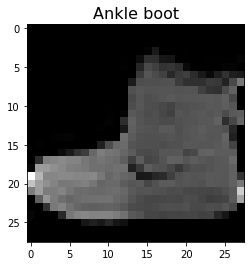

In [21]:
plt.imshow(X[0], cmap="gray")
plt.title(class_names[y[0]], fontsize=16,)
plt.show()

### Model Creation

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [52]:
model.compile(
    optimizer = keras.optimizers.Adam(), ## SGD
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [53]:
EPOCHS = 10
VERBOSE = 2
VALIDATION_SPLIT = .3
SHUFFLE = True
BATCH_SIZE = 8
model.fit(x=X, y=y, batch_size= BATCH_SIZE, verbose=VERBOSE, shuffle=SHUFFLE, validation_split=VALIDATION_SPLIT, epochs=EPOCHS)

Epoch 1/10
6125/6125 - 13s - loss: 0.3804 - accuracy: 0.8594 - val_loss: 0.3845 - val_accuracy: 0.8600
Epoch 2/10
6125/6125 - 11s - loss: 0.3445 - accuracy: 0.8709 - val_loss: 0.3736 - val_accuracy: 0.8656
Epoch 3/10
6125/6125 - 11s - loss: 0.3231 - accuracy: 0.8789 - val_loss: 0.3865 - val_accuracy: 0.8626
Epoch 4/10
6125/6125 - 11s - loss: 0.3085 - accuracy: 0.8835 - val_loss: 0.3767 - val_accuracy: 0.8655
Epoch 5/10
6125/6125 - 11s - loss: 0.2899 - accuracy: 0.8910 - val_loss: 0.3388 - val_accuracy: 0.8768
Epoch 6/10
6125/6125 - 11s - loss: 0.2792 - accuracy: 0.8941 - val_loss: 0.3684 - val_accuracy: 0.8726
Epoch 7/10
6125/6125 - 11s - loss: 0.2665 - accuracy: 0.8992 - val_loss: 0.3440 - val_accuracy: 0.8811
Epoch 8/10
6125/6125 - 12s - loss: 0.2581 - accuracy: 0.9021 - val_loss: 0.3514 - val_accuracy: 0.8781
Epoch 9/10
6125/6125 - 12s - loss: 0.2485 - accuracy: 0.9068 - val_loss: 0.3503 - val_accuracy: 0.8792
Epoch 10/10
6125/6125 - 11s - loss: 0.2418 - accuracy: 0.9091 - val_loss:

### Analysing the Model

> We are not over-fitting the model that's because training accuracy and evaluating accuracy and loss are not far away from each other.

### Making predictions

In [48]:
class_names[np.argmax(model.predict(X[9:10]))],class_names[ y[9:10][0]]

('Sandal', 'Sandal')

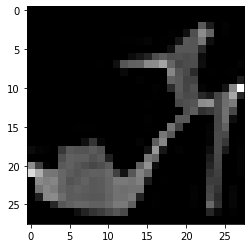

In [50]:
plt.imshow(X[9], cmap="gray")
plt.show()

> Done!! **The model seems to predict very well**